# 1 - Overview/Introduction:

### In this tutorial we will learn 3 key things to using Architector:

**(A)** How to define basic input dictionaries for Architector.

**(B)** How to understand and visualize outputs from Architector.

**(C)** How to play with potentially important parameters for getting at chemical meaning.

## Starting from **(A)**: 
Architector operates entirely within python for the general user taking an input dictionary, returning an output dictionary.

In [1]:
# Initialize Input Dictionary:
inputDict = dict()

For the first example we will make and Iron Hexa Aqua Complex : [Fe(H<sub>2</sub>O)<sub>6</sub>]<sup>2+</sup> / [Fe(H<sub>2</sub>O)<sub>6</sub>]<sup>3+</sup>

There are 3 high-level inputs to Architector in an input dictionary to be aware of:

## 1. Core: Dictionary:

Indicates what metal is present, what its coordination number (CN) or number of of connections are, or specific core coordination. So for Iron Hexa-Aqua we will need to specify two parameters:

In [2]:
# Initialize Core Dictionary
coreDict = dict()

# Specify the metal:
coreDict['metal'] = 'Fe'

# Specify the coordination number (CN):
coreDict['coreCN'] = 6

### That's it! Now we can add core to the input dictionary:

In [3]:
# Add the core to the input dictionary:
inputDict['core'] = coreDict

## 2. Ligands Dictionary:

The ligands input to Architector specifies which ligands and the relative numbers of ligands passed. 

The ligands section of the inputDict is at the base level a python list of ligands represented as a dictionary:

In [4]:
# Initilize Ligand List
ligList = []

# Define Water dictionary
water = dict()

The simplest way to define ligands is from only the ligands SMILES string and the list of coordinating atoms.

[SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) is one of the most common methods for representing molecules for chemists. For water (H<sub>2</sub>O), and most common chemicals, we can find their representative smiles strings even on [wikipedia](https://en.wikipedia.org/wiki/Properties_of_water) or on [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/Water) from a quick google search.

For water, the SMILES is 'O'. 

In [5]:
# Add SMILES definition
water['smiles'] = 'O'

Since there is only one heavy element (Z > 1) in water, the only coordination site for the molecule is the first element, which corresponds to a (0-indexed) site of [0]. For more on SMILES and coordination site identification see the second tutorial: 2-Ligand_Identification.ipynb.

In [6]:
# Add coordination site list
water['coordList'] = [0]

### Finally, we need to add 6 waters to the input dictionary for Iron Hexa-Aqua:

In [7]:
# Add six copies of water to the ligand list:
ligList += [water] * 6 

# Add the ligands to the inputDictionary
inputDict['ligands'] = ligList

## 3. Parameters

The parameters section of architector can give you broad leeway to specify how you want the construction of the molecules to occur.

A basic parameters input requires just an empty dictionary. To increase this complexity by just a bit we will add the desired oxidation state to the parameters.  (giving: [Fe(H<sub>2</sub>O)<sub>6</sub>]<sup>2+</sup>)

In [8]:
# Initialize Parameters dictionary
parameters = dict()

# Specify oxidation state of 2 for the metal
parameters['metal_ox'] = 2

### And add these parameters to the input dictionary:

In [9]:
inputDict['parameters'] = parameters

### Now we have a fully assembled input dictionary for [Fe(H<sub>2</sub>O)<sub>6</sub>]<sup>2+</sup>

This is quite easy to print out in a jupyter notebook:

In [10]:
inputDict

{'core': {'metal': 'Fe', 'coreCN': 6},
 'ligands': [{'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]}],
 'parameters': {'metal_ox': 2}}

#### Note that a FULL description of potential input dictionary parameters and values can be found in the README.md file.

In [11]:
# Now we Import the main building functionalities and the in-built visualization of architector:
from architector import build_complex, view_structures

#### Now, we build the complex!

Building the first complex should take just a couple seconds:

In [12]:
# We can see it print out information as it is processing.
# The last line should be: 'ComplexSanity:  True'
out = build_complex(inputDict)

                 Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGSLineSearch:    0 11:39:00     -879.004000*      10.4273
LBFGSLineSearch:    1 11:39:00     -883.602233*       4.8847
LBFGSLineSearch:    2 11:39:00     -887.137920*       4.6210
LBFGSLineSearch:    3 11:39:00     -887.943813*       2.2476
LBFGSLineSearch:    4 11:39:00     -889.176683*       6.3614
LBFGSLineSearch:    5 11:39:00     -890.508707*       4.2796
LBFGSLineSearch:    6 11:39:00     -891.041882*       1.6044
LBFGSLineSearch:    7 11:39:00     -891.137838*       0.5253
LBFGSLineSearch:    8 11:39:00     -891.157531*       0.4713
LBFGSLineSearch:    9 11:39:00     -891.182295*       0.4063
LBFGSLineSearch:   10 11:39:00     -891.230936*       0.4577
LBFGSLineSearch:   11 11:39:00     -891.248170*       0.2615
LBFGSLineSearch:   12 11:39:00     -891.257939*       0.2086
LBFGSLineSearch:   13 11:39:00     -891.267972*       0.3261
LBFGSLineSearch:   14 11:39:00     -8

## Now, onto **(B)** :  Understanding and visualizing output from architector

There's obviously a lot going on here:

In [13]:
out

OrderedDict([('octahedral_0_nunpairedes_4_charge_2',
              {'ase_atoms': Atoms(symbols='FeOH2OH2OH2OH2OH2OH2', pbc=False, initial_charges=..., initial_magmoms=..., calculator=XTB(...)),
               'total_charge': 2,
               'xtb_n_unpaired_electrons': 4,
               'calc_n_unpaired_electrons': 4,
               'metal_ox': 2,
               'init_energy': -887.7533566864396,
               'energy': -892.6643217408563,
               'mol2string': '@<TRIPOS>MOLECULE\nCharge: 2 Unpaired_Electrons: 4 XTB_Unpaired_Electrons: 4 Key: octahedral_0_nunpairedes_4_charge_2 .mol2\n    19    18     1     0     0\nSMALL\nNoCharges\n****\nGenerated from Architector\n\n@<TRIPOS>ATOM\n     1 Fe1       0.0000    0.0000   -0.0003   Fe        1 RES1   0.0000\n     2 O1        0.0000    0.0000    2.3449   O.3       1 RES1   0.0000\n     3 H1       -0.6439   -0.4203    2.9241   H         1 RES1   0.0000\n     4 H2        0.6439    0.4203    2.9241   H         1 RES1   0.0000\n     5

#### So let's first just visualize the structures:

In [14]:
view_structures(out)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [15]:
# We can also add labels to describe the structures:
labels = list(out.keys()) # Here, I am just pulling out the keys describing each structure
view_structures(out,labels=labels)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

#### We can also look at what architector assigns as the defualt charge and spin for verification

In [16]:
key = labels[0] # Pull out the first structure to get spin/charge states
print('Metal Oxidation State: ',out[key]['metal_ox'])
print('Total System Charge: ',out[key]['total_charge'])
print('Total N Unpaired Electrons (spin): ',out[key]['calc_n_unpaired_electrons'])

Metal Oxidation State:  2
Total System Charge:  2
Total N Unpaired Electrons (spin):  4


#### Note that the default spin state for Fe in Architector is high-spin (4 unpaired electrons means spin multiplicity = 5)!

## Now for (C), we want to generate  [Fe(H<sub>2</sub>O)<sub>6</sub>]<sup>3+</sup> to see if there's a difference!

Looking at different charge and spin states can be key to understanding the structure and function of different first-row transition metal complexes as in [This Work](https://pubs.rsc.org/en/content/articlelanding/2020/cp/d0cp02977g).

We can copy the inputDict and simply modify in place to create Fe3+ Hexa-Aqua!

In [17]:
# Import copy
import copy

In [18]:
# Copy inputDict
new_inputDict = copy.deepcopy(inputDict)
# Set the metal oxidation state to 3 instead
new_inputDict['parameters']['metal_ox'] = 3

Printing out the new input dictionary reveals the slight shift:

Note that during building the is_actinide, and original metal flags get added in case an actinide is passed as an input.

In [19]:
new_inputDict

{'core': {'metal': 'Fe', 'coreCN': 6, 'smiles': '[Fe]'},
 'ligands': [{'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]}],
 'parameters': {'metal_ox': 3, 'is_actinide': False, 'original_metal': 'Fe'}}

### Now we can build the [Fe(H<sub>2</sub>O)<sub>6</sub>]<sup>3+</sup> 

In [20]:
# Build new molecule (Takes maybe 30 seconds)
out1 = build_complex(new_inputDict)

                 Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGSLineSearch:    0 11:39:11     -858.454592*       9.6760
LBFGSLineSearch:    1 11:39:11     -862.186634*       4.2541
LBFGSLineSearch:    2 11:39:11     -865.763201*       3.8627
LBFGSLineSearch:    3 11:39:11     -866.449027*       1.9458
LBFGSLineSearch:    4 11:39:11     -867.606682*       6.0631
LBFGSLineSearch:    5 11:39:11     -869.141150*       1.6714
LBFGSLineSearch:    6 11:39:11     -869.274388*       1.0732
LBFGSLineSearch:    7 11:39:11     -869.332755*       0.4727
LBFGSLineSearch:    8 11:39:11     -869.356648*       0.4316
LBFGSLineSearch:    9 11:39:11     -869.383884*       0.5214
LBFGSLineSearch:   10 11:39:11     -869.412783*       0.2436
LBFGSLineSearch:   11 11:39:11     -869.427234*       0.4034
LBFGSLineSearch:   12 11:39:11     -869.448190*       0.3851
LBFGSLineSearch:   13 11:39:12     -869.462216*       0.2331
LBFGSLineSearch:   14 11:39:12     -8

In [21]:
# Let's visualize the strucutres again:
view_structures(out1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### How about the spin and charge?

The structures look very similar, so let's check the spin and charge:

In [22]:
key = list(out1.keys())[0]
print('Metal Oxidation State: ',out1[key]['metal_ox'])
print('Total System Charge: ',out1[key]['total_charge'])
print('Total N Unpaired Electrons (spin): ',out1[key]['calc_n_unpaired_electrons'])

Metal Oxidation State:  3
Total System Charge:  3
Total N Unpaired Electrons (spin):  5


So we can see we've created both High Spin (HS) [Fe(H<sub>2</sub>O)<sub>6</sub>]<sup>3+</sup> in the out1 dictionary, and [Fe(H<sub>2</sub>O)<sub>6</sub>]<sup>2+</sup> in the out dictionary.

For simplicity and tracking sake, let's rename these variables accordingly:

In [23]:
hs_fe2_dict = out
hs_fe3_dict = out1

## Still in (C), let's measure the difference in bond distances betwee the two charge state structures!

We will be using numpy package for analysis:

In [24]:
import numpy as np

#### Let's look at the High-Spin (HS) Fe-O distances for both the octahedral 2+ and 3+ forms using the following function:

For this function we will also be using several of the built-in functionality of the [ASE Atoms](https://wiki.fysik.dtu.dk/ase/ase/atoms.html) output included in every output dictionary.

In [25]:
def avg_fe_o_dist(ase_atoms):
    # Have ase atoms gives all the functionality of ase!
    symbols = np.array(ase_atoms.get_chemical_symbols()) # List of chemical symbols
    distances = ase_atoms.get_all_distances() # Matrix (Natoms x Natoms) of distances in Angstroms
    # Pull out the indices of Fe, and O:
    fe_ind = np.where(symbols == 'Fe')[0]
    o_inds = np.where(symbols == 'O')[0]
    # Now tablulate Fe-O distances
    dists = [distances[fe_ind,x] for x in o_inds]
    avg_dists = np.mean(dists) # And take the average
    return avg_dists

We first look at Fe2+-O distances.

In [26]:
fe2key = list(hs_fe2_dict.keys())[0]
hs_fe2_avg_dist = avg_fe_o_dist(hs_fe2_dict[fe2key]['ase_atoms'])
print('Average Fe2+-O distance (Angstroms):', hs_fe2_avg_dist)

Average Fe2+-O distance (Angstroms): 2.347411381080871


In [27]:
# Same procedure for F3+-O!
fe3key = list(hs_fe3_dict.keys())[0]
hs_fe3_avg_dist = avg_fe_o_dist(hs_fe3_dict[fe3key]['ase_atoms'])
print('Average F3+-O distance (Angstroms):', hs_fe3_avg_dist)

Average F3+-O distance (Angstroms): 2.309006695989517


### So we can see that the 3+ Fe-O distance is slightly shorter than the 2+ Fe-O distance.

This is in agreement with intuition, where more highly charged metal center attracts negatively charged O stronger!

## What about if we want to look at different spin states, e.g. Low-Spin (LS) Configurations?

Now we can simply re-copy the input dictionary and edit again to examine low-spin configurations:

In [28]:
fe2_ls_inputDict = copy.deepcopy(inputDict)

In [29]:
# Here, we assign the metal spin to be 0 and let architector ultimately assign the spin:
fe2_ls_inputDict['parameters']['metal_ox'] = 2
fe2_ls_inputDict['parameters']['metal_spin'] = 0

Quick spot-check to make sure the parameters are what we'd like for LS Fe2+ Hexa-Aqua

In [30]:
fe2_ls_inputDict

{'core': {'metal': 'Fe', 'coreCN': 6, 'smiles': '[Fe]'},
 'ligands': [{'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]}],
 'parameters': {'metal_ox': 2,
  'is_actinide': False,
  'original_metal': 'Fe',
  'metal_spin': 0}}

Looks good! Now we can build the LS Fe2+ complex:

In [31]:
ls_fe2_dict = build_complex(fe2_ls_inputDict)

                 Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGSLineSearch:    0 11:39:23     -880.503583*       9.4402
LBFGSLineSearch:    1 11:39:23     -884.081951*       4.5510
LBFGSLineSearch:    2 11:39:23     -887.582849*       6.2967
LBFGSLineSearch:    3 11:39:24     -888.225044*       3.9047
LBFGSLineSearch:    4 11:39:24     -889.200375*       3.0926
LBFGSLineSearch:    5 11:39:24     -890.223709*       3.0278
LBFGSLineSearch:    6 11:39:24     -890.768422*       1.5978
LBFGSLineSearch:    7 11:39:24     -891.051875*       1.3514
LBFGSLineSearch:    8 11:39:24     -891.282353*       1.3101
LBFGSLineSearch:    9 11:39:24     -891.527526*       2.2070
LBFGSLineSearch:   10 11:39:24     -891.690672*       1.1575
LBFGSLineSearch:   11 11:39:24     -891.796246*       1.0773
LBFGSLineSearch:   12 11:39:24     -891.831412*       0.6926
LBFGSLineSearch:   13 11:39:24     -891.880463*       0.6096
LBFGSLineSearch:   14 11:39:24     -8

And again we can visualize!

In [32]:
view_structures(ls_fe2_dict)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Wait! In some cases for LS - only one unique geometry is generated!

This is because Architector automatically removes duplicate geometries unless otherwise requested.

For verification, let's check the spin/charge states of the complex:

In [33]:
key = list(ls_fe2_dict.keys())[0]
print('Metal Oxidation State: ',ls_fe2_dict[key]['metal_ox'])
print('Total System Charge: ',ls_fe2_dict[key]['total_charge'])
print('Total N Unpaired Electrons (spin): ',ls_fe2_dict[key]['calc_n_unpaired_electrons'])

Metal Oxidation State:  2
Total System Charge:  2
Total N Unpaired Electrons (spin):  0


# LS Fe2+ Looks good - how about LS Fe3+?

Here, we again copy the input dictionary:

In [34]:
# How about for LS Fe3+ ?
fe3_ls_inputDict = copy.deepcopy(new_inputDict)

To highlight that Architector automatically determines the closest chemically-relevant spin, we will again assign the spin of LS Fe3+ to 0, when we know there is at least 1 unpaired electron (meaning LS should be 1!)

In [35]:
fe3_ls_inputDict['parameters']['metal_spin'] = 0
fe3_ls_inputDict # Print out the assemble dictionary

{'core': {'metal': 'Fe', 'coreCN': 6, 'smiles': '[Fe]'},
 'ligands': [{'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]},
  {'smiles': 'O', 'coordList': [0]}],
 'parameters': {'metal_ox': 3,
  'is_actinide': False,
  'original_metal': 'Fe',
  'metal_spin': 0}}

Now build the Fe3+ LS structure:

In [36]:
ls_fe3_dict = build_complex(fe3_ls_inputDict)

                 Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGSLineSearch:    0 11:39:40     -862.949512*       7.6993
LBFGSLineSearch:    1 11:39:40     -865.384459*       3.9280
LBFGSLineSearch:    2 11:39:40     -867.556413*       4.4308
LBFGSLineSearch:    3 11:39:40     -868.271421*       1.7757
LBFGSLineSearch:    4 11:39:40     -869.439328*       2.7457
LBFGSLineSearch:    5 11:39:40     -870.306467*       1.1144
LBFGSLineSearch:    6 11:39:40     -870.409950*       0.5527
LBFGSLineSearch:    7 11:39:40     -870.439686*       0.3569
LBFGSLineSearch:    8 11:39:40     -870.458629*       0.4743
LBFGSLineSearch:    9 11:39:40     -870.506606*       0.6758
LBFGSLineSearch:   10 11:39:40     -870.597874*       0.9607
LBFGSLineSearch:   11 11:39:41     -870.733749*       1.4896
LBFGSLineSearch:   12 11:39:41     -871.044555*       1.5615
LBFGSLineSearch:   13 11:39:41     -871.303803*       1.2222
LBFGSLineSearch:   14 11:39:41     -8

LBFGSLineSearch:   16 11:39:52     -872.444646*       0.1146
LBFGSLineSearch:   17 11:39:52     -872.449153*       0.2969
LBFGSLineSearch:   18 11:39:52     -872.461410*       0.2580
LBFGSLineSearch:   19 11:39:53     -872.465941*       0.1683
LBFGSLineSearch:   20 11:39:53     -872.471443*       0.3672
LBFGSLineSearch:   21 11:39:53     -872.476208*       0.2595
LBFGSLineSearch:   22 11:39:53     -872.480219*       0.1110
LBFGSLineSearch:   23 11:39:53     -872.484353*       0.2073
LBFGSLineSearch:   24 11:39:53     -872.490995*       0.3222
LBFGSLineSearch:   25 11:39:53     -872.504713*       0.6112
LBFGSLineSearch:   26 11:39:53     -872.516341*       0.2704
LBFGSLineSearch:   27 11:39:53     -872.525551*       0.2418
LBFGSLineSearch:   28 11:39:53     -872.533802*       0.2879
LBFGSLineSearch:   29 11:39:53     -872.548424*       0.4898
LBFGSLineSearch:   30 11:39:53     -872.558071*       0.3862
LBFGSLineSearch:   31 11:39:53     -872.566756*       0.6242
LBFGSLineSearch:   32 11

In [37]:
view_structures(ls_fe3_dict)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Note that we might be back to all three structures for LS Fe3+!

Here, we will again check that spin and charge have been correctly assigned:

In [38]:
key = list(ls_fe3_dict.keys())[0]
print('Metal Oxidation State: ',ls_fe3_dict[key]['metal_ox'])
print('Total System Charge: ',ls_fe3_dict[key]['total_charge'])
print('Total N Unpaired Electrons (spin): ',ls_fe3_dict[key]['calc_n_unpaired_electrons'])

Metal Oxidation State:  3
Total System Charge:  3
Total N Unpaired Electrons (spin):  1


### Looks like low-spin Fe3+,  and that the 0 was automaticlaly shifted to 1 upaired electron for the Fe3+ system.

If you try and assign an un-physical spin state Architector will automatically correct it to the closest possible physically-meaningful spin state!

### Let's also examine the Fe-O bond distances in the LS configurations.

Here we'd expect LS Fe-O bond lengths to be shorter than their HS counterparts!

In [39]:
ls_fe2_key = list(ls_fe2_dict.keys())[0]
ls_fe2_atoms = ls_fe2_dict[ls_fe2_key]['ase_atoms']
ls_fe2_avg_dist = avg_fe_o_dist(ls_fe2_dict[ls_fe2_key]['ase_atoms'])
print('Average LS Fe2+-O distance (Angstroms): ',ls_fe2_avg_dist)

Average LS Fe2+-O distance (Angstroms):  2.1525566640554845


In [40]:
ls_fe3_key = list(ls_fe3_dict.keys())[0]
ls_fe3_atoms = ls_fe3_dict[ls_fe3_key]['ase_atoms']
ls_fe3_avg_dist = avg_fe_o_dist(ls_fe3_dict[ls_fe3_key]['ase_atoms'])
print('Average LS Fe3+-O distance (Angstroms): ',ls_fe3_avg_dist)

Average LS Fe3+-O distance (Angstroms):  2.0401222418948493


### We see the same trend for Fe2+-O vs. Fe3+-O distances in the LS vs. HS! 

How about if we plot out all of these Fe-O distances for different oxidation states:

In [41]:
# Here, we'll use matplotib to generate a plot!
import matplotlib.pyplot as plt

Basic plotting with metal oxidation state and average distances:

Text(0, 0.5, 'Average Fe-O distance ($\\AA$)')

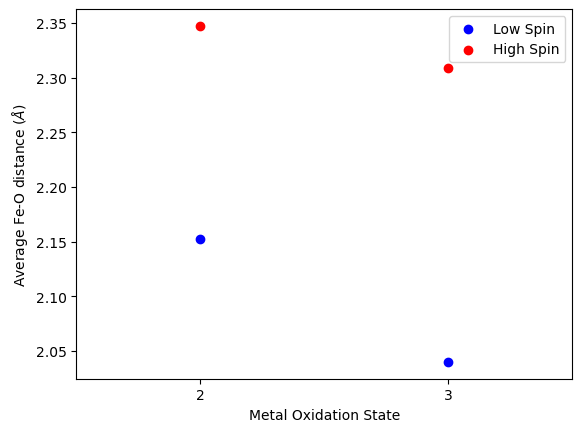

In [42]:
x = [2,3] # Oxidation states
plt.scatter(x,[ls_fe2_avg_dist,ls_fe3_avg_dist],label='Low Spin',color='b')
plt.scatter(x,[hs_fe2_avg_dist,hs_fe3_avg_dist],label='High Spin',color='r')
plt.xlim(1.5,3.5)
plt.xticks([2,3])
plt.legend()
plt.xlabel('Metal Oxidation State')
plt.ylabel('Average Fe-O distance ($\AA$)')

## Looks exactly like what we'd expect from chemical intuition!

The [XTB](https://xtb-docs.readthedocs.io/) methods Architector use in the background capture these chemical trends near-perfect!

## Finally, for any of these structures, we can write out potential structures to use in any external electronic structure code!

Uncomment (remove the #s) and run the cell below to get a labelled .xyz file for LS Fe3+ - Hexa-Aqua!

In [43]:
# label = list(ls_fe3_dict.keys())[0]
# ase_atoms = ls_fe3_dict[label]['ase_atoms']
# ase_atoms.write(label+'.xyz')

# Conclusion

In this tutorial we used Fe Hexa Aqua as an example to learn 3 key basic features of Architector:

**(A)** How to define basic input dictionaries for Architector.

**(B)** How to understand and visualize outputs from Architector.

**(C)** How to play with potentially important parameters for getting at chemical meaning.